<b>`Import all the libraries for Data Analysis, Visualisation, Random Forest & Logisic Regression`</b>

In [49]:
# Import all the libraries for Data Analysis, Visualisation, Random Forest & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import Normalizer
# For building logistic regression model
import statsmodels.api as sm
from sklearn.cluster import KMeans
from kneed import KneeLocator
# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE

# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Importing SVC
from sklearn.svm import SVC


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
                        
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Importing the PCA module
from sklearn.decomposition import PCA

# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pickle

`import data for analysis`

In [4]:
data = pd.read_csv('../data/Task1_clean_data.csv')

In [5]:
df = data.copy()

In [6]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,36749741.0,308879636.0,1.570185,2.905912,3.701304,18.355943,17.855187,292.426453,180.558843,345.629377
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1.933278,4.414096,0.937385,39.359124,35.565545,609.920783,541.959383,707.185356
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1.726277,10.229119,3.363124,34.425237,23.751202,229.980251,414.908351,307.690973
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,0.657493,11.811761,2.070983,36.534765,15.092588,810.387875,761.837216,889.352748
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,0.912788,7.748843,2.110349,34.222253,17.539799,531.237049,564.619822,607.681403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,57628851.0,574175259.0,3.517065,12.784914,0.690876,27.955095,37.561864,535.806880,16.751926,631.804110
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,39135081.0,666648844.0,2.352181,4.415361,2.121718,22.165518,40.643294,631.628095,714.638145,705.783925
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,34912224.0,592786405.0,1.260239,6.585469,2.058277,24.516413,15.029702,566.933800,132.415585,627.698629
149999,1.311448e+19,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,29626096.0,371895920.0,0.823109,7.757267,2.850914,17.122508,16.494842,355.066446,816.120043,401.522016


In [8]:
# Import user experience data
user_exp = pd.read_csv('../data/user_exp.csv')

# Import user engagement data
user_eng = pd.read_csv('../data/user_engagement.csv')

In [13]:
with open("../models/user_engagement.pkl", "rb") as f:
    kmeans1 = pickle.load(f)
    
with open("../models/user_experience.pkl", "rb") as f:
    kmeans2 = pickle.load(f)


In [14]:
user_exp.head()

,msisdn/number,cluster,avg_rtt_total,avg_tp_total,total_avg_tcp_total
0,3.360100e+10,2,46.0,76.0,589679.5
1,3.360100e+10,2,31.0,99.0,589679.5
2,3.360100e+10,2,50.0,97.0,589679.5
3,3.360101e+10,2,84.0,248.0,22015.5
4,3.360101e+10,2,119.0,56844.0,9960511.5


<i>`Engagement Score `</i>

In [15]:
user_eng.head()

,msisdn/number,cluster,sessions,dur._(ms),total_data
0,3.360100e+10,0,1,116720.0,8.786906e+08
1,3.360100e+10,2,1,181230.0,1.568596e+08
2,3.360100e+10,0,1,134969.0,5.959665e+08
3,3.360101e+10,0,1,49878.0,4.223207e+08
4,3.360101e+10,0,2,37104.0,1.457411e+09


`distance between centroids`

In [16]:
user_eng_df = user_eng.set_index('msisdn/number')[
    ['sessions','dur._(ms)', 'total_data']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(user_eng_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.488567,-0.158015,0.382288
1,-0.488567,0.188146,-1.087675
2,-0.488567,-0.060090,-0.193462
3,-0.488567,-0.516689,-0.547080
4,0.752095,-0.585234,1.560816


In [19]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.763190,-0.246834,0.597172
1,-0.404738,0.155864,-0.901051
2,-0.923740,-0.113614,-0.365781
3,-0.544549,-0.575892,-0.609766
4,0.411264,-0.320020,0.853492


In [20]:
distance = kmeans1.fit_transform(data_normalized)
distance_from_less_engagement = list(
    map(lambda x: x[3], distance))
user_eng['engagement_score'] = distance_from_less_engagement
user_eng.head(5)

,msisdn/number,cluster,sessions,dur._(ms),total_data,engagement_score
0,3.360100e+10,0,1,116720.0,8.786906e+08,1.638161
1,3.360100e+10,2,1,181230.0,1.568596e+08,1.652937
2,3.360100e+10,0,1,134969.0,5.959665e+08,1.819934
3,3.360101e+10,0,1,49878.0,4.223207e+08,1.934161
4,3.360101e+10,0,2,37104.0,1.457411e+09,1.169013


In [21]:
user_expr = user_exp.copy()
user_expr.drop([106855], axis=0, inplace=True)

In [22]:
exp_df = user_expr.set_index('msisdn/number')
distance = kmeans2.fit_transform(data_normalized)
distance_from_worest_experiance = list(
    map(lambda x: x[0], distance))
user_expr['experience_score'] = distance_from_worest_experiance
user_expr.head(5)

,msisdn/number,cluster,avg_rtt_total,avg_tp_total,total_avg_tcp_total,experience_score
0,3.360100e+10,2,46.0,76.0,589679.5,0.437560
1,3.360100e+10,2,31.0,99.0,589679.5,1.263870
2,3.360100e+10,2,50.0,97.0,589679.5,0.640821
3,3.360101e+10,2,84.0,248.0,22015.5,0.840732
4,3.360101e+10,2,119.0,56844.0,9960511.5,1.341616


In [23]:
user_eng_id = user_eng['msisdn/number'].values
user_expr_id = user_expr['msisdn/number'].values
user_intersection = list(
    set(user_eng_id).intersection(user_expr_id))
user_intersection[:5]

[33662697474.0, 33665581058.0, 33628094468.0, 33666105351.0, 33782497288.0]

In [24]:
user_eng_df = user_eng[user_eng['msisdn/number'].isin(
    user_intersection)]

In [25]:
user_exper_df = user_expr[user_expr['msisdn/number'].isin(
    user_intersection)]

`Calulate the satisfaction score for each customer based on engagement & experience score`

In [26]:
user_df = pd.merge(user_eng_df, user_exper_df, on='msisdn/number')
user_df['satisfaction_score'] = (
    user_df['engagement_score'] + user_df['experience_score'])/2
user_df.head(5)

,msisdn/number,cluster_x,sessions,dur._(ms),total_data,engagement_score,cluster_y,avg_rtt_total,avg_tp_total,total_avg_tcp_total,experience_score,satisfaction_score
0,3.360100e+10,0,1,116720.0,8.786906e+08,1.638161,2,46.0,76.0,589679.5,0.437560,1.037860
1,3.360100e+10,2,1,181230.0,1.568596e+08,1.652937,2,31.0,99.0,589679.5,1.263870,1.458404
2,3.360100e+10,0,1,134969.0,5.959665e+08,1.819934,2,50.0,97.0,589679.5,0.640821,1.230377
3,3.360101e+10,0,1,49878.0,4.223207e+08,1.934161,2,84.0,248.0,22015.5,0.840732,1.387447
4,3.360101e+10,0,2,37104.0,1.457411e+09,1.169013,2,119.0,56844.0,9960511.5,1.341616,1.255315


In [27]:
satisfaction_df = user_df[['msisdn/number', 'engagement_score',
                        'experience_score', 'satisfaction_score']]
satisfaction_df = satisfaction_df.set_index('msisdn/number')

In [28]:
top_10_satisfaction = satisfaction_df.nlargest(10, 'satisfaction_score')
top_10_satisfaction.head(10)

,engagement_score,experience_score,satisfaction_score
msisdn/number,,,
3.366879e+10,1.957912,1.862770,1.910341
3.366499e+10,1.956995,1.861319,1.909157
3.378363e+10,1.956059,1.861748,1.908904
3.366601e+10,1.957557,1.858154,1.907855
3.367650e+10,1.956079,1.858849,1.907464
3.378345e+10,1.957503,1.857185,1.907344
3.369864e+10,1.950349,1.862046,1.906198
3.367639e+10,1.955122,1.855984,1.905553
3.366505e+10,1.957436,1.851927,1.904682


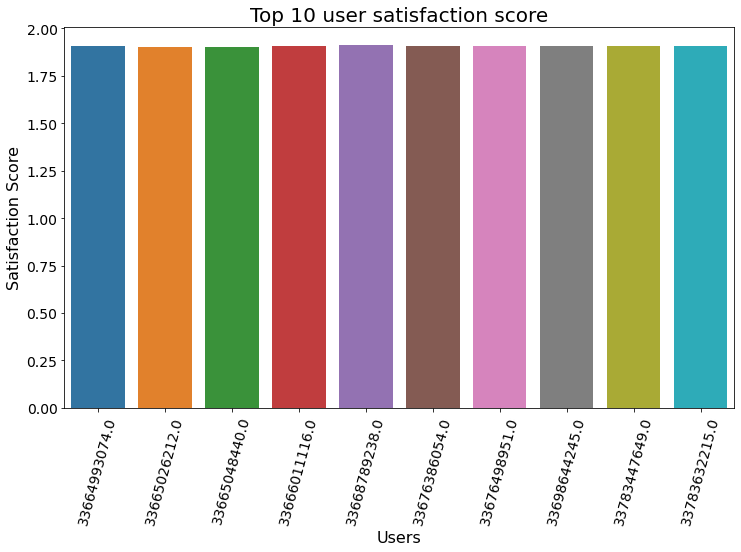

In [29]:
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_satisfaction, x=top_10_satisfaction.index, y=top_10_satisfaction['satisfaction_score'])
plt.title(label = "Top 10 user satisfaction score", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel = "Users", fontsize=16)
plt.ylabel(ylabel = "Satisfaction Score", fontsize=16)
plt.show()

<b>`Run a Regression model to predict the Satisfaction score of customer`</b>

In [39]:
X = satisfaction_df[['engagement_score', 'experience_score']]
Y = satisfaction_df[['satisfaction_score']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(85483, 2)
(21371, 2)
(85483, 1)
(21371, 1)


In [44]:
from sklearn.linear_model import LinearRegression
# fit the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# predict and evaluate
def rmse(true, pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(true, pred))

In [46]:
# predict on test set
y_pred = lr.predict(X_test)
rmse(y_test, y_pred)

6.916670023538463e-16

<b>`Another Regression Model GradientBoosting Regressor`</b>

In [50]:
model_grb = GradientBoostingRegressor(n_estimators=50, learning_rate=0.2, random_state=21)
model_grb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=50, random_state=21)

In [51]:
# predict on test set
y_pred_grb = model_grb.predict(X_test)
rmse(y_test, y_pred_grb)

0.016091603760086552

Text(0, 0.5, 'Predicted Value')

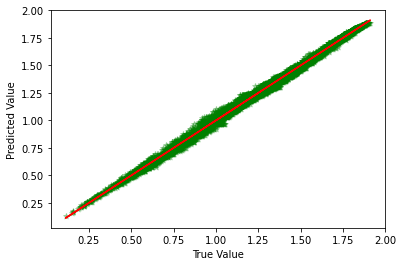

In [52]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred_grb, alpha=0.3, color='green', marker='*')
plt.plot(y_test, y_test, color='red') # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [53]:
y_pred[:5]

array([[0.92368236],
       [1.36024534],
       [0.91737248],
       [1.43703767],
       [1.37640009]])

<b>`If RMSE is closer to 0 then the model is a good model base on the reported RMSE- Root Mean Squared Error which is 0.0160 the model is pretty good`</b>

In [56]:
# save model
pickle.dump(model_grb, open('../models/grb_model.pkl', 'wb'))